In [ ]:
https://challenge2019.isic-archive.com/leaderboard.html
https://pytorch.org/docs/master/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss

In [ ]:
!pip install albumentations --upgrade albumentations

Requirement already up-to-date: albumentations in /usr/local/lib/python3.6/dist-packages (0.4.6)


In [ ]:
import time
import torch
import pandas as pd
import os
import numpy as np
#from tqdm.no  import tqdm
from tqdm.notebook import tqdm
from IPython.core.debugger import set_trace
import random
import PIL.Image as Image
import matplotlib.pyplot as plt
import cv2
#import pretrainedmodels
import albumentations as A


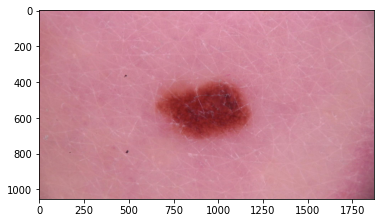

In [ ]:
path = '/content/drive/My Drive/melanoma/arg_imge'
names = ['ISIC_0052212.jpg', 'ISIC_0068279.jpg', 'ISIC_0068279.jpg']
img = cv2.imread(os.path.join(path, names[0]))
img = cv2.cvtColor(img,  cv2.COLOR_BGR2RGB)
plt.imshow(img)

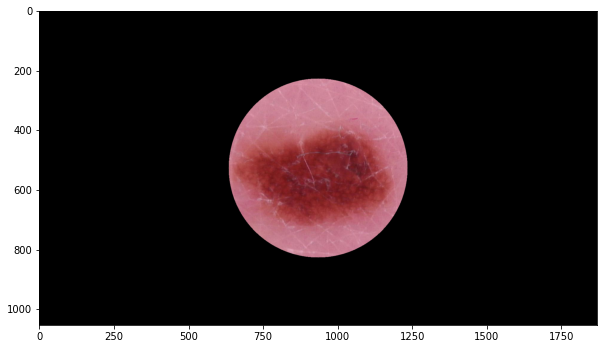

In [ ]:
plt.figure(figsize=(10,10))
circ = cv.circle(
    (np.ones(img.shape) * 255).astype(np.uint8),
    (img.shape[1]//2, img.shape[0]//2),
    300,
    (0,0,0),
    -1
)
mask = circ
img = cv.subtract(img, mask)
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

# Find contour and sort by contour area
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

# Find bounding box and extract ROI
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = img[y:y+h, x:x+w]
    break

plt.imshow('ROI',ROI)

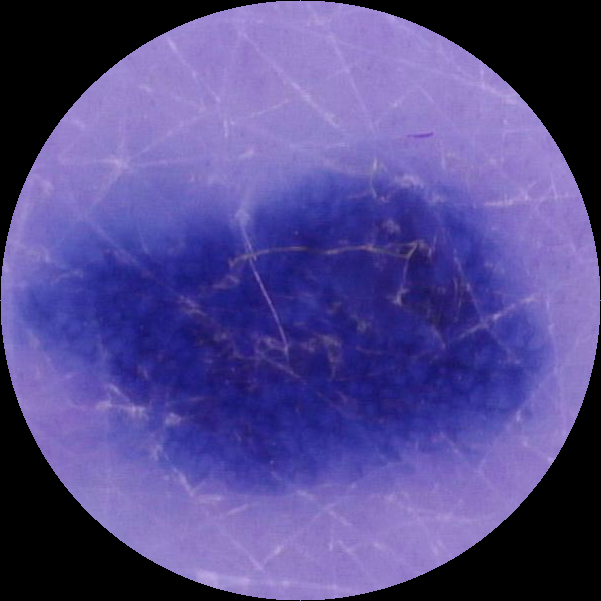

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load image, convert to grayscale, and find edges

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

# Find contour and sort by contour area
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

# Find bounding box and extract ROI
"""
Функция cv2.boundingRect () OpenCV используется для рисования приблизительного
прямоугольника вокруг двоичного изображения. Эта функция используется в основном для выделения 
интересующей области после получения контуров из изображения.
"""
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = img[y:y+h, x:x+w]
    break

cv2_imshow(ROI)


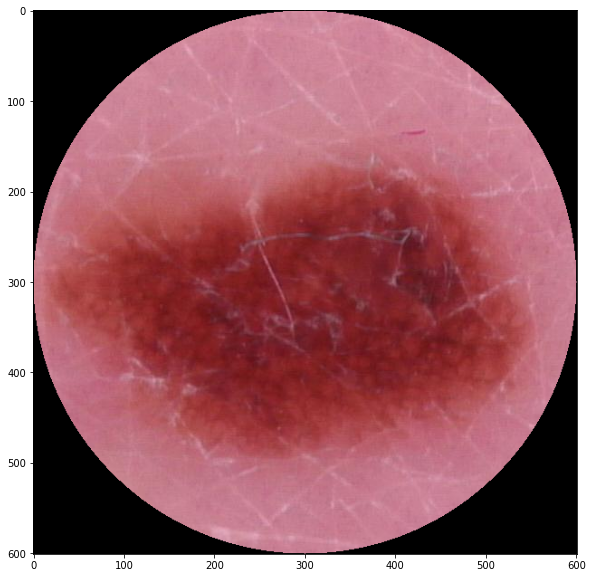

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ROI)

#thresh порог
Для каждого пикселя применяется одно и то же пороговое значение.
Если значение пикселя меньше порогового значения, оно устанавливается на 0, в
противном случае устанавливается на максимальное значение. Функция cv.threshold
используется для определения порога. Первый аргумент - это исходное изображение,
которое должно быть изображением в оттенках серого. Второй аргумент - это пороговое значение, 
которое используется для классификации значений пикселей.


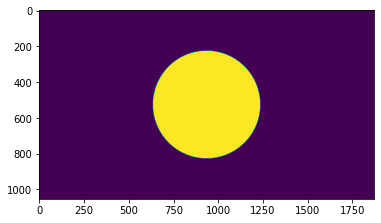

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
plt.imshow(thresh[1])

findCounter

indContours( кадр, режим_группировки, метод_упаковки [, контуры[, иерархия[, сдвиг]]])

кадр
- должным образом подготовленная для анализа картинка. Это должно быть 8-битное изображение. Поиск контуров использует для работы монохромное изображение, так что все пиксели картинки с ненулевым цветом будут интерпретироваться как 1, а все нулевые останутся нулями.
 - **четыре режима группировки**:
    - CV_RETR_LIST — выдаёт все контуры без группировки;
    - CV_RETR_EXTERNAL — выдаёт только крайние внешние контуры. 
    - CV_RETR_CCOMP — группирует контуры в двухуровневую иерархию. На верхнем уровне — внешние контуры объекта. На втором уровне — контуры отверстий, если таковые имеются. Все остальные контуры попадают на верхний уровень.
    - CV_RETR_TREE — группирует контуры в многоуровневую иерархию.
  - **метод_упаковки** — один из трёх методов упаковки контуров:
    - CV_CHAIN_APPROX_NONE — упаковка отсутствует и все контуры хранятся в виде отрезков, состоящих из двух пикселей.
    - CV_CHAIN_APPROX_SIMPLE — склеивает все горизонтальные, вертикальные и диагональные контуры.
    - CV_CHAIN_APPROX_TC89_L1,CV_CHAIN_APPROX_TC89_KCOS — применяет к контурам метод упаковки (аппроксимации) Teh-Chin.


контуры — список всех найденных контуров, представленных в виде векторов; иерархия — информация о топологии контуров. Каждый элемент иерархии представляет собой сборку из четырех индексов, которая соответствует контуру[i]:

- иерархия[i][0] — индекс следующего контура на текущем слое;
- иерархия[i][1] — индекс предыдущего контура на текущем слое:
- иерархия[i][2] — индекс первого контура на вложенном слое;
- иерархия[i][3] — индекс родительского контура.

**сдвиг** — величина смещения точек контура.

In [ ]:
# Find contour and sort by contour area
cnts = cv2.findContours(thresh[1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

## drawcontours 

drawContours( кадр, контуры, индекс, цвет[, толщина[, тип_линии[, иерархия[, макс_слой[, сдвиг]]]]])

image - Целевое изображение.

contours - Все входные контуры. Каждый контур сохраняется как вектор точки.

contourIdx - Параметр, указывающий контур для рисования. Если он отрицательный, рисуются все контуры.

color - Цвет контуров.

толщина - Толщина линий, по которым нарисованы контуры. Если он отрицательный (например, толщина = CV_FILLED), внутренняя часть контура прорисовывается.

lineType - Связность линии. Подробности смотрите в строке ().

иерархия - дополнительная информация об иерархии. Он нужен только в том случае, если вы хотите нарисовать только часть контуров (см. MaxLevel).

maxLevel - Максимальный уровень нарисованных контуров. Если он равен 0, рисуется только указанный контур. Если он равен 1, функция рисует контур (-ы) и все вложенные контуры. Если это 2, функция рисует контуры, все вложенные контуры, все контуры, вложенные во вложенные, и так далее. Этот параметр учитывается только при наличии иерархии.

offset - Дополнительный параметр смещения контура. Сдвинуть все нарисованные контуры на заданное значение \ texttt {offset} = (dx, dy).

contour - Указатель на первый контур.

externalColor - Цвет внешних контуров.

holeColor - Цвет внутренних контуров (отверстий).

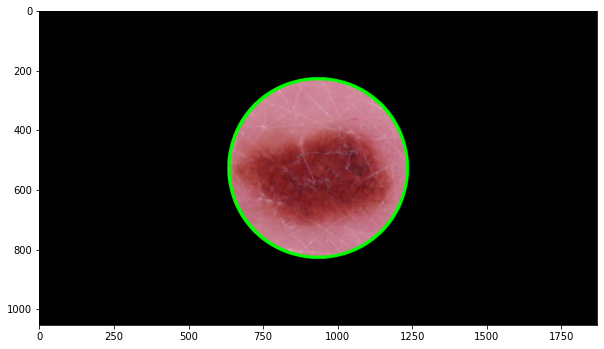

In [ ]:
plt.figure(figsize=(10,10))
cv2.drawContours(img, cnts[0], -1, (0, 255, 0), 10)
plt.imshow(img)

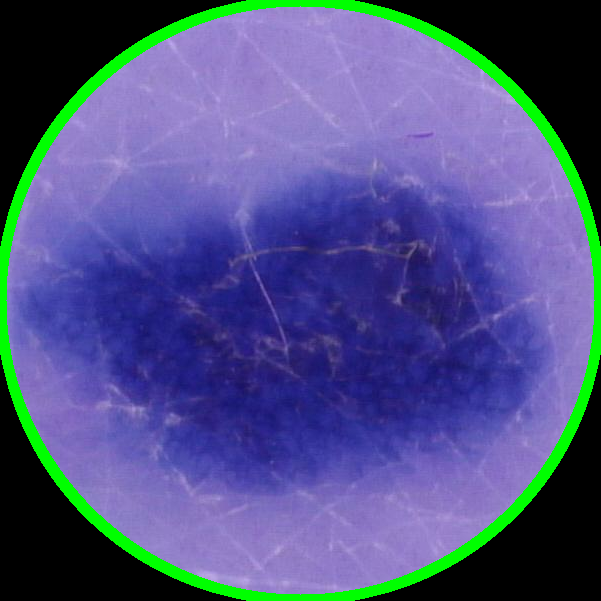

In [ ]:
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

# Find bounding box and extract ROI
"""
Функция cv2.boundingRect () OpenCV используется для рисования приблизительного
прямоугольника вокруг двоичного изображения. Эта функция используется в основном для выделения 
интересующей области после получения контуров из изображения.
"""
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = img[y:y+h, x:x+w]
    break

cv2_imshow(ROI)

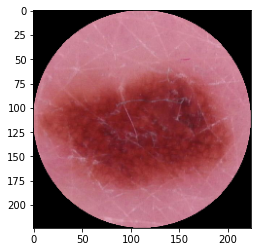

In [ ]:
plt.imshow(cv2.resize(ROI, (224,224)))

In [ ]:
def make_circle_img(image: np.array, area: int = 300) -> np.array:
  
  """
  image defaulet image from data
  area size 
  """
  circ = cv2.circle(
      (np.ones(image.shape) * 255).astype(np.uint8),
      (image.shape[1]//2, image.shape[0]//2),
      area,
      (0,0,0),
      -1
      )
  
  mask = circ
  image = cv2.subtract(image, mask)

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]
  cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
  for c in cnts:
      x,y,w,h = cv2.boundingRect(c)
      ROI = image[y:y+h, x:x+w]
      break
  return ROI

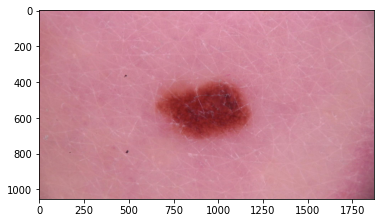

In [ ]:
path = '/content/drive/My Drive/melanoma/arg_imge'
names = ['ISIC_0052212.jpg', 'ISIC_0068279.jpg', 'ISIC_0081956.jpg']
img = cv2.imread(os.path.join(path, names[0]))
img = cv2.cvtColor(img,  cv2.COLOR_BGR2RGB)
plt.imshow(img)

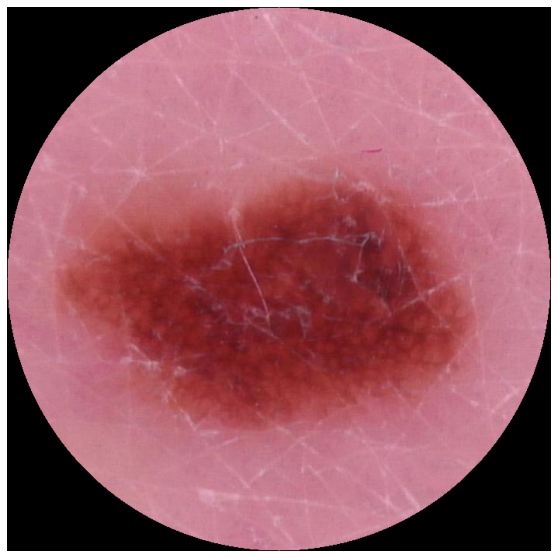

In [ ]:
img = cv2.imread(os.path.join(path, names[0]))
img = cv2.cvtColor(img,  cv2.COLOR_BGR2RGB)
imgg = make_circle_img(img, 350)
vis(imgg)

#AUg

In [ ]:
def visualize(image):
  plt.figure(figsize=(10, 10))
  # plt.axis('off')
  plt.imshow(image)

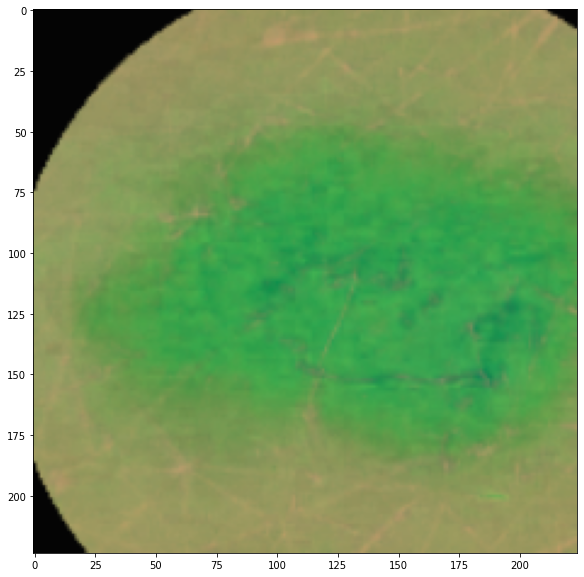

In [ ]:
transform = A.Compose([
                       A.RandomContrast(0.2),
                       A.RandomBrightness(0.2),
                       A.VerticalFlip(),
                       A.HorizontalFlip(),
                       A.OneOf([
                                A.ToGray(),
                                A.CLAHE(),
                                A.NoOp(),                                                 
                       ]),
                       A.OneOf([
                                # A.GaussianBlur(),
                                A.MedianBlur(7),
                                # A.MotionBlur(),
                                A.NoOp()]),
                       A.Resize(224,224, p =1),
                       A.Cutout(16, 30, 30),
                       #A.Normalize (mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0),
                       #A.RandomCrop(168, 168),
                       A.RandomSizedCrop(min_max_height=(168, 168), height=224, width=224, p=0.5)
                       ])

transform2 = A.Compose([
                       A.ToGray(p=1),
                       A.RandomContrast(0.2),
                       A.RandomBrightness(0.2),
                       A.VerticalFlip(),
                       A.HorizontalFlip(),   
                       A.OneOf([
                                # A.GaussianBlur(),
                                A.MedianBlur(7),
                                # A.MotionBlur(),
                                A.NoOp()]),
                       A.Resize(224,224, p =1),
                       A.Cutout(16, 30, 30),
                       #A.Normalize (mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0),
                       A.RandomCrop(168, 168)
                       ])


path = '/content/drive/My Drive/melanoma/arg_imge'
names = ['ISIC_0052212.jpg', 'ISIC_0068279.jpg', 'ISIC_0081956.jpg']
img = cv2.imread(os.path.join(path, names[0]))
img = cv2.cvtColor(img,  cv2.COLOR_RGB2Lab)
imgg = make_circle_img(img, 350)

data = transform(image=imgg)
visualize(data['image'])

In [ ]:
from skimage import filters as skifilters
from scipy import ndimage
from skimage import filters

def shades_gray(image, njet=0, mink_norm=1, sigma=1):
    """
    Estimates the light source of an input_image as proposed in:
    J. van de Weijer, Th. Gevers, A. Gijsenij
    "Edge-Based Color Constancy"
    IEEE Trans. Image Processing, accepted 2007.
    Depending on the parameters the estimation is equal to Grey-World, Max-RGB, general Grey-World,
    Shades-of-Grey or Grey-Edge algorithm.
    :param image: rgb input image (NxMx3)
    :param njet: the order of differentiation (range from 0-2)
    :param mink_norm: minkowski norm used (if mink_norm==-1 then the max
           operation is applied which is equal to minkowski_norm=infinity).
    :param sigma: sigma used for gaussian pre-processing of input image
    :return: illuminant color estimation
    :raise: ValueError
    
    Ref: https://github.com/MinaSGorgy/Color-Constancy
    """
    gauss_image = filters.gaussian(image, sigma=sigma, multichannel=True)
    if njet == 0:
        deriv_image = [gauss_image[:, :, channel] for channel in range(3)]
    else:   
        if njet == 1:
            deriv_filter = filters.sobel
        elif njet == 2:
            deriv_filter = filters.laplace
        else:
            raise ValueError("njet should be in range[0-2]! Given value is: " + str(njet))     
        deriv_image = [np.abs(deriv_filter(gauss_image[:, :, channel])) for channel in range(3)]
    for channel in range(3):
        deriv_image[channel][image[:, :, channel] >= 255] = 0.
    if mink_norm == -1:  
        estimating_func = np.max 
    else:
        estimating_func = lambda x: np.power(np.sum(np.power(x, mink_norm)), 1 / mink_norm)
    illum = [estimating_func(channel) for channel in deriv_image]
    som   = np.sqrt(np.sum(np.power(illum, 2)))
    illum = np.divide(illum, som)
    return illum

def correct_image(image, illum):
    """
    Corrects image colors by performing diagonal transformation according to 
    given estimated illumination of the image.
    :param image: rgb input image (NxMx3)
    :param illum: estimated illumination of the image
    :return: corrected image
    
    Ref: https://github.com/MinaSGorgy/Color-Constancy
    """
    correcting_illum = illum * np.sqrt(3)
    corrected_image = image / 255.
    for channel in range(3):
        corrected_image[:, :, channel] /= correcting_illum[channel]
    return np.clip(corrected_image, 0., 1.)

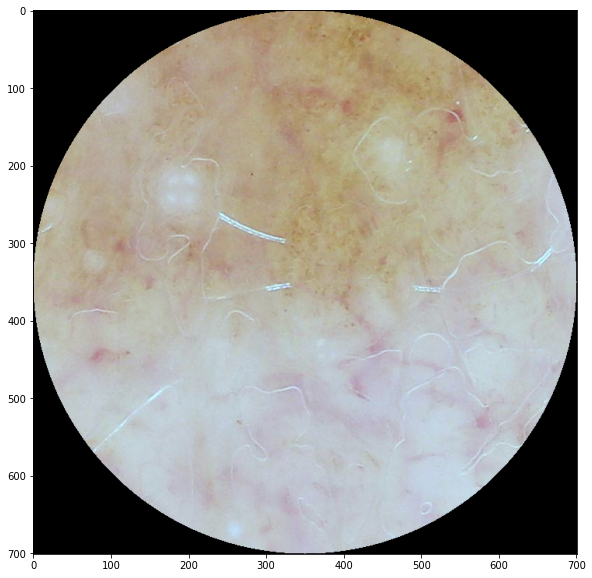

In [ ]:
sg = shades_gray(imgg, njet=0, mink_norm=6, sigma=0)
cm = correct_image(imgg, sg)
visualize(cm)